In [1]:
import os, sys
sys.path.append( os.path.join('..', '..'))

import numpy as np
from scipy.constants import e, k, epsilon_0

# my own modules
from src.solver import Poisson_solver1D as solver1D
from src.solver import updater
from src.model.carrier_density import *

# Si PNP Junction (homojunction)

A Si PNP junction with low doping ($N_a, N_d = 10^{16}$) <br>
Na : acceptor doping density <br>
Nd : donor doping density <br>
Ec : conduction band edge <br>
Ev : valence band edge <br>
Ef : Fermi level  <br>
n  : electron (carrier) density <br>
p  : hole (carrier) density <br>
Field : electric field <br>
V  : voltage <br>

In [2]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-2e-4, 2e-4, 1000) # cm
L = 1.0e-4
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[ [-np.inf,-L], [L,np.inf] ]) # cm^-3
Nd = dope_constant_donor(   x = x, Na = 1e16, x_range=[-L,L]) # cm^-3
epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [3]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  



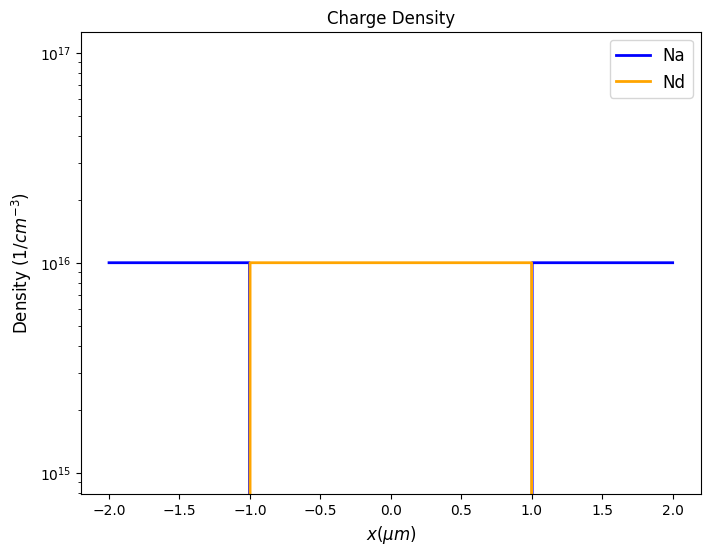

In [4]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [5]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 90%|████████▉ | 896/1000 [00:02<00:00, 391.95it/s]


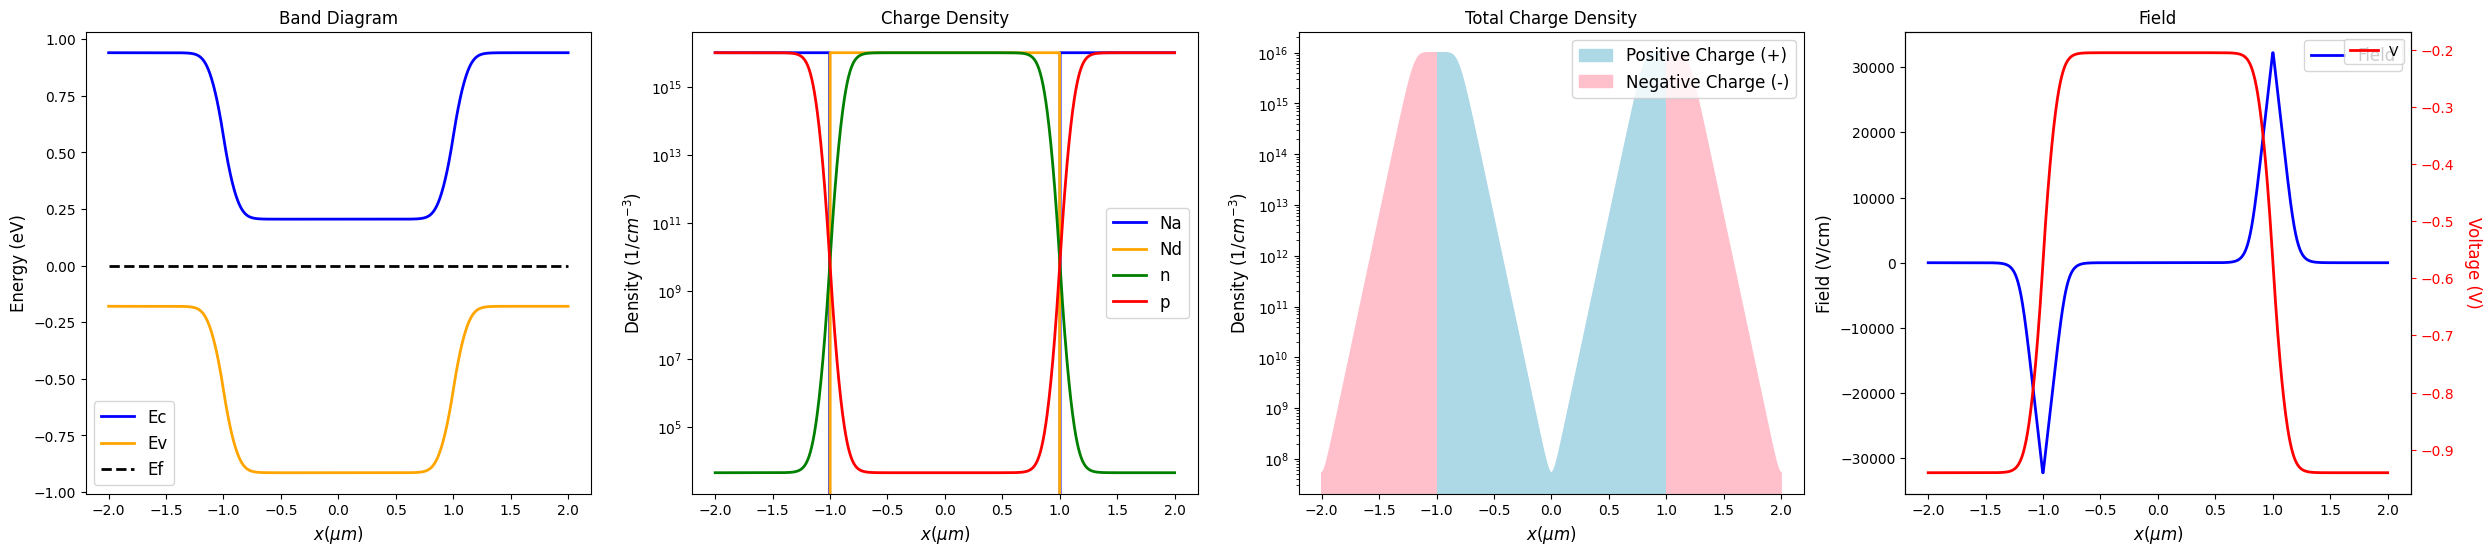

In [6]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

Two separate PN junctions.

# Si PNP Junction / Coupled
A Si PNP junction with low doping ($N_a, N_d = 10^{16}$) but with very thin N type region <br>
Na : acceptor doping density <br>
Nd : donor doping density <br>
Ec : conduction band edge <br>
Ev : valence band edge <br>
Ef : Fermi level  <br>
n  : electron (carrier) density <br>
p  : hole (carrier) density <br>
Field : electric field <br>
V  : voltage <br>

In [7]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 

x = np.linspace(-2e-4, 2e-4, 1000) # cm
L = 0.1e-4
Na = dope_constant_acceptor(x = x, Nd = 1e16, x_range=[ [-np.inf,-L], [L,np.inf] ]) # cm^-3
Nd = dope_constant_donor(   x = x, Na = 1e16, x_range=[-L,L]) # cm^-3

epsilon_q =  epsilon_0 * 1e-2 * get_episolon_r_at_different_x(x = x, materials=['Si',], x_range=[[-np.inf, np.inf],]) / e 

In [8]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return to_poisson_source(charge_density = cal_total_charge_density(x, V), epsilon=epsilon_q)
def d_src_dV_fun(x, V):
    return to_poisson_source(charge_density = cal_dtotal_charge_density_dV(x, V), epsilon=epsilon_q)  



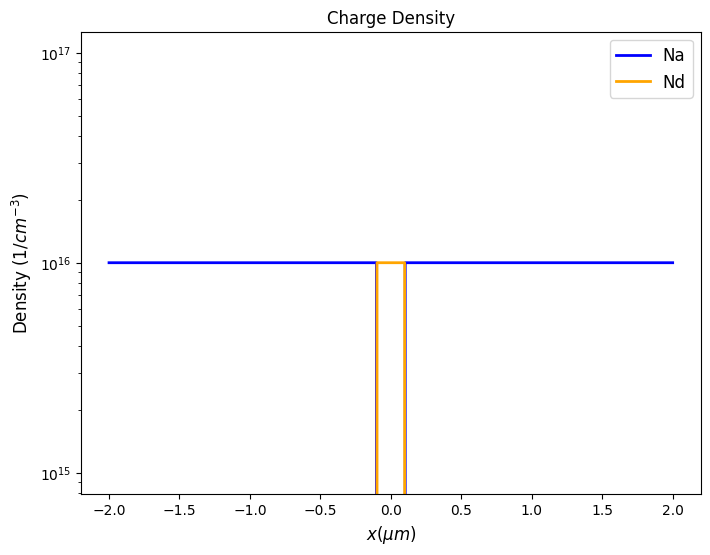

In [9]:
""" plot doping """
solver1D.plot_carrier_density_1D(x, Na = Na, Nd = Nd);

In [10]:
""" solve Poisson equation """
V_updater = updater.AdagradUpdater(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=10000)

 67%|██████▋   | 6660/10000 [00:16<00:08, 398.44it/s]


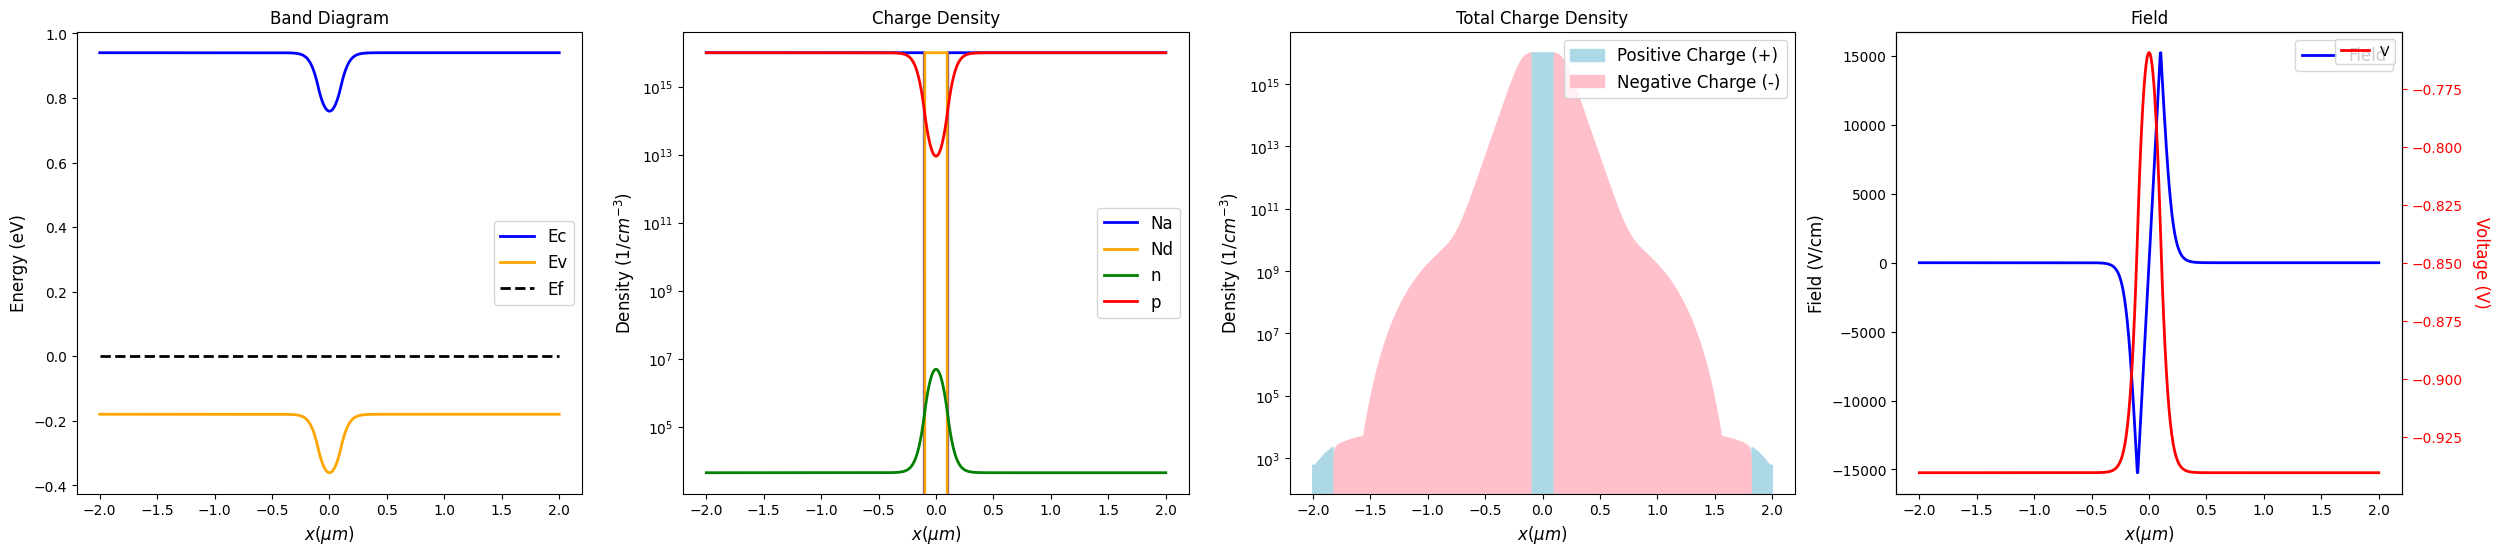

In [11]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = cal_electric_field(x, V)

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

Becasuse of ultra thin N type region, the total electron density cannot support such high hole density. Therefore, even in N type region, the hole density is higher than the electron density. <br> 
Maybe you can say that the total electron amout cannot neutralized the holes from two P type region. Actually, it is a steady state and the diffusion is not explicitly involved in the simulation. It is hard to said that it is a diffusion phenomenon (but you also can said that becuase it is implicit). 